In [4]:
#!pip install matplotlib

In [ ]:
'''
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)


In [29]:
import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility
'''
model.add(Conv2D(64, (5, 5), strides=(2,2),
                 activation='relu',
                 input_shape=(32, 32, 3),
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
'''
#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, (5,5), activation='relu', padding="same",
			input_shape=input_shape, kernel_initializer='he_normal',
                 bias_initializer='zeros'))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
		# CONV => RELU => POOL
		model.add(Conv2D(50, (5,5), activation='relu', padding="same",
			input_shape=input_shape, kernel_initializer='he_normal',
                 bias_initializer='zeros'))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500, activation='relu'))
		 
		# a softmax classifier
		model.add(Dense(classes, activation='softmax'))
		

		return model

In [30]:
# network and training
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
opt = keras.optimizers.Adam()
#OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
mnist = keras.datasets.mnist
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = ( IMG_ROWS, IMG_COLS, 1)

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#K.set_image_dim_ordering("th")

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
#X_train = X_train[:, np.newaxis, :, :]
#X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = np_utils.to_categorical(y_train, NB_CLASSES)
#y_test = np_utils.to_categorical(y_test, NB_CLASSES)
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
print(model.summary())

60000 train samples
10000 test samples


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 20)          │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 50)          │          25,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2450)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 500)                 │       1,225,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,256,080 (4.79 MB)

 Trainable params: 1,256,080 (4.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8647 - loss: 0.5353 - val_accuracy: 0.9820 - val_loss: 0.0626
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9846 - loss: 0.0493 - val_accuracy: 0.9868 - val_loss: 0.0474
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9911 - loss: 0.0272 - val_accuracy: 0.9883 - val_loss: 0.0393
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9936 - loss: 0.0216 - val_accuracy: 0.9893 - val_loss: 0.0393
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9949 - loss: 0.0164 - val_accuracy: 0.9863 - val_loss: 0.0556
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9852 - val_loss: 0.0548
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9898 - val_loss: 0.0431
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9970 - loss: 0.0089 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


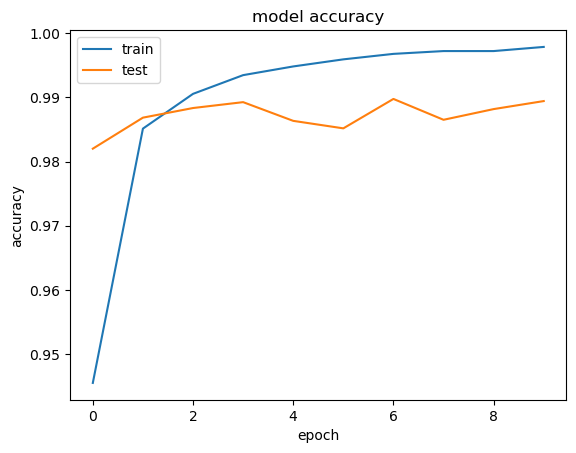

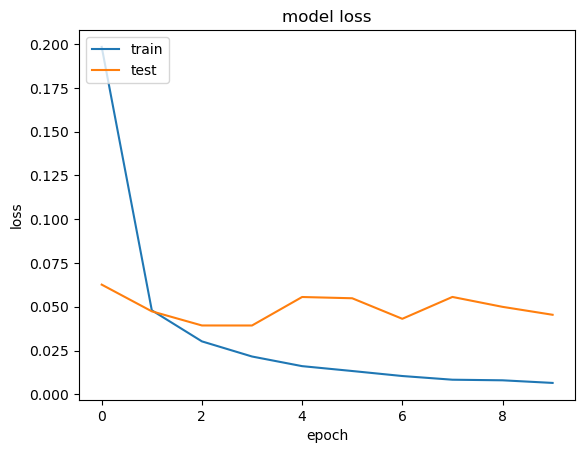

In [32]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()